Iris Flower classification

In [2]:
import numpy as np
import pandas as pd
import sys

dataset = pd.read_csv('IRIS.csv')

dataset.shape

(150, 5)

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


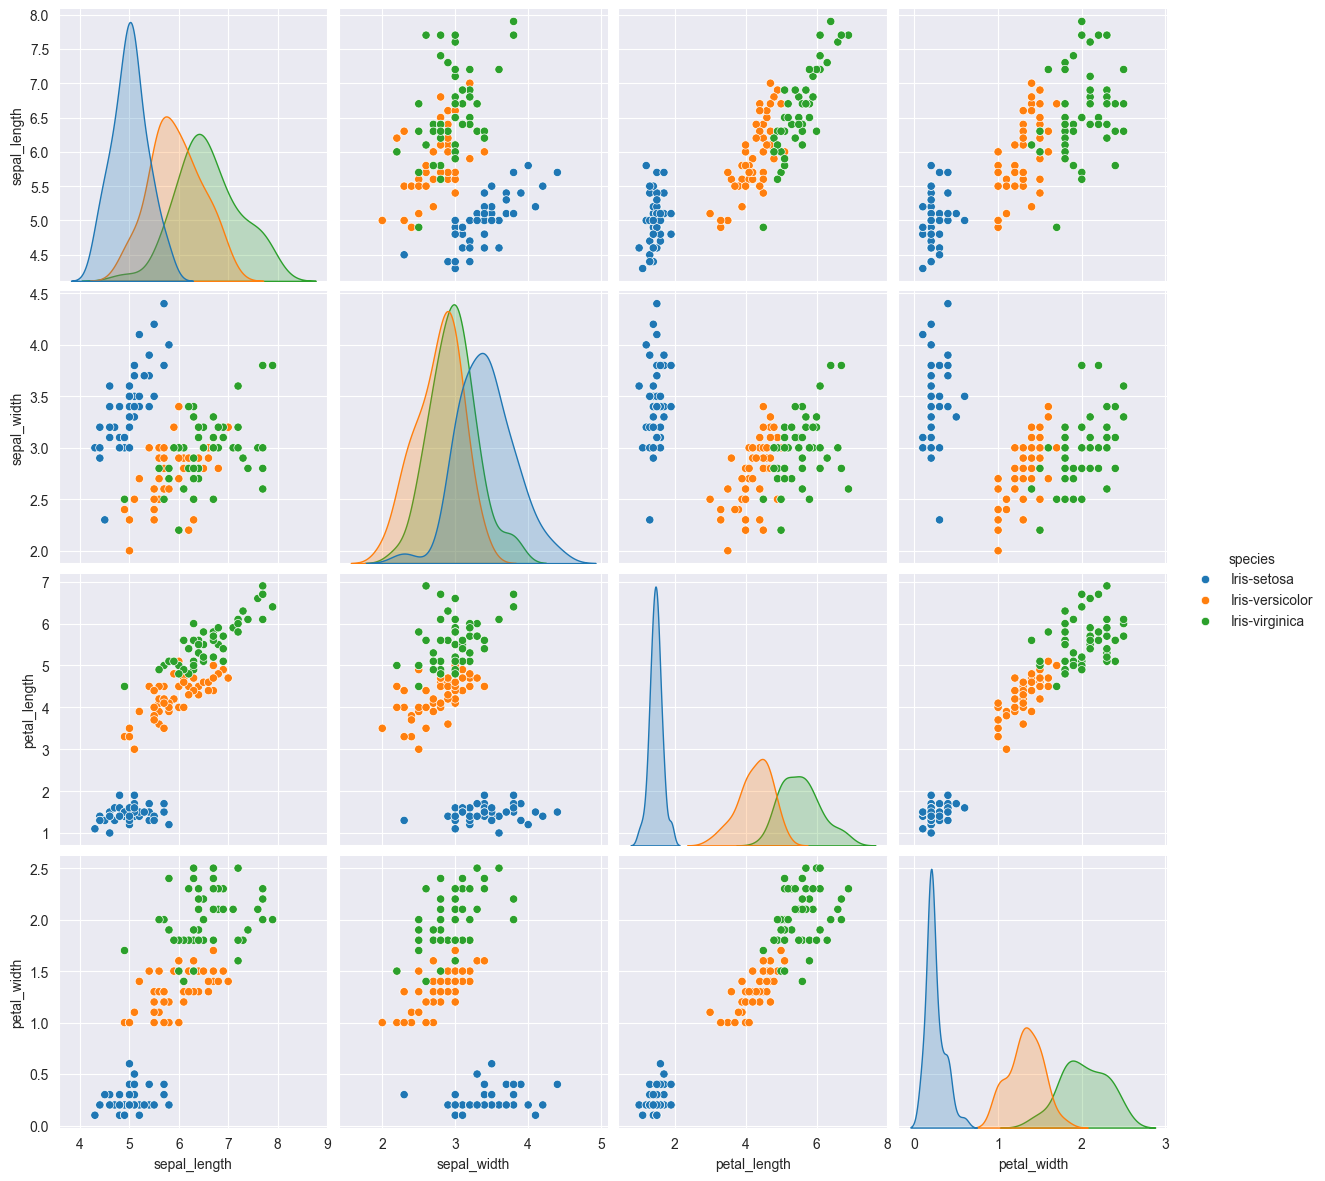

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(dataset, hue="species", height=3)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = dataset.copy()  # dataframe
x = df.drop(['species'], axis=1)  # тренировочные/тестовые данные
y = df['species']  # ответы для нейросети

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
from sklearn.preprocessing import StandardScaler

# разделение данных на обучающие и тренировачные(x_train - input, y_train - output)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

new_y_train = []
for i in range(len(y_train)):
    new_y_train.append([1 if j == y_train[i] else 0 for j in range(3)])
y_train = new_y_train

new_y_test = []
for i in range(len(y_test)):
    new_y_test.append([1 if j == y_test[i] else 0 for j in range(3)])
y_test = new_y_test

In [11]:
np.random.seed(1)

alpha, iterations, hidden_size, input_d, num_labels = (0.001, 250, 40, 4, 3)

weights_0_1 = 0.2 * np.random.random((input_d, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1


 I:0 Error:0.741 Correct:0.11666666666666667 Test-Err:0.671 Test-Acc:0.36666666666666664
 I:1 Error:0.667 Correct:0.2
 I:2 Error:0.647 Correct:0.24166666666666667
 I:3 Error:0.632 Correct:0.25
 I:4 Error:0.615 Correct:0.425
 I:5 Error:0.598 Correct:0.6333333333333333
 I:6 Error:0.580 Correct:0.65
 I:7 Error:0.560 Correct:0.6583333333333333
 I:8 Error:0.541 Correct:0.6583333333333333
 I:9 Error:0.520 Correct:0.6583333333333333
 I:10 Error:0.500 Correct:0.6583333333333333 Test-Err:0.483 Test-Acc:0.7
 I:11 Error:0.480 Correct:0.6583333333333333
 I:12 Error:0.460 Correct:0.6583333333333333
 I:13 Error:0.443 Correct:0.6583333333333333
 I:14 Error:0.427 Correct:0.6583333333333333
 I:15 Error:0.413 Correct:0.6583333333333333
 I:16 Error:0.400 Correct:0.6583333333333333
 I:17 Error:0.390 Correct:0.6583333333333333
 I:18 Error:0.382 Correct:0.6583333333333333
 I:19 Error:0.375 Correct:0.6583333333333333
 I:20 Error:0.369 Correct:0.6583333333333333 Test-Err:0.355 Test-Acc:0.7
 I:21 Error:0.364 

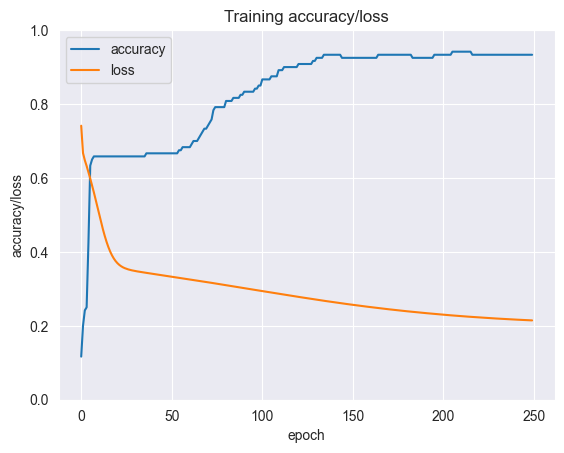

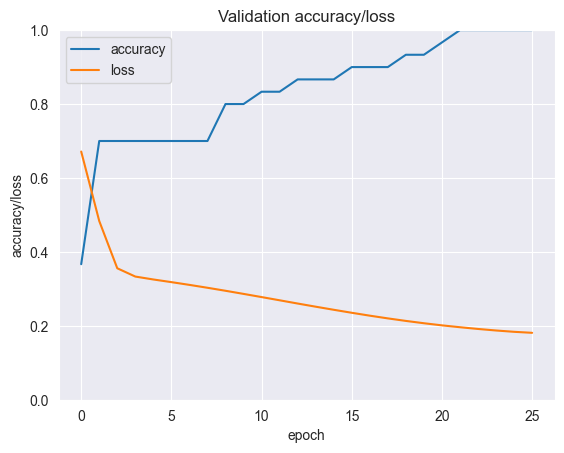

In [12]:
def relu(node):  # activation function
    return (node >= 0) * node


def relu2deriv(output):  # derivative of activation function
    return output >= 0


def softmax(ner):
    temp = np.exp(ner)
    return temp / np.sum(temp, axis=1, keepdims=True)


loss = []
accuracy = []

loss_test = []
accuracy_test = []

for interation in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(len(x_train)):
        layer_0 = x_train[i:i + 1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        # dropout_mask = np.random.randint(2, size=layer_1.shape)
        # layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1, weights_1_2)

        error += np.sum((layer_2 - y_train[i:i + 1]) ** 2)

        correct_cnt += int(np.argmax(layer_2) == np.argmax(y_train[i:i + 1]))

        layer_2_delta = (y_train[i:i + 1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        # layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write(
        "\n" + " I:" + str(interation) + " Error:" + str(error / float(len(x_train)))[0:5] + " Correct:" + str(
            correct_cnt / float(len(x_train))))
    loss.append(error / float(len(x_train)))
    accuracy.append(correct_cnt / float(len(x_train)))

    if interation % 10 == 0 or interation == iterations - 1:
        error, correct_cnt = (0.0, 0)
        for i in range(len(x_test)):
            layer_0 = x_test[i:i + 1]
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            error += np.sum((y_test[i:i + 1] - layer_2) ** 2)
            correct_cnt += int(np.argmax(layer_2) == np.argmax(y_test[i:i + 1]))

        sys.stdout.write(
            " Test-Err:" + str(error / float(len(x_test)))[0:5] + " Test-Acc:" + str(correct_cnt / float(len(x_test))))
        loss_test.append(error / float(len(x_test)))
        accuracy_test.append(correct_cnt / float(len(x_test)))

epoch = [i for i in range(iterations)]
epoch_test = [i for i in range(26)]

plt.plot(epoch, accuracy, label="accuracy")
plt.plot(epoch, loss, label="loss")
plt.title('Training accuracy/loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1)
plt.show()

plt.plot(epoch_test, accuracy_test, label="accuracy")
plt.plot(epoch_test, loss_test, label="loss")
plt.title('Validation accuracy/loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1)
plt.show()

Следующих код это анализ, сколько нейронов в скрытом слое наиболее эффективней

Max accuracy: 0.9416666666666667 Min loss: 0.4359755138380232


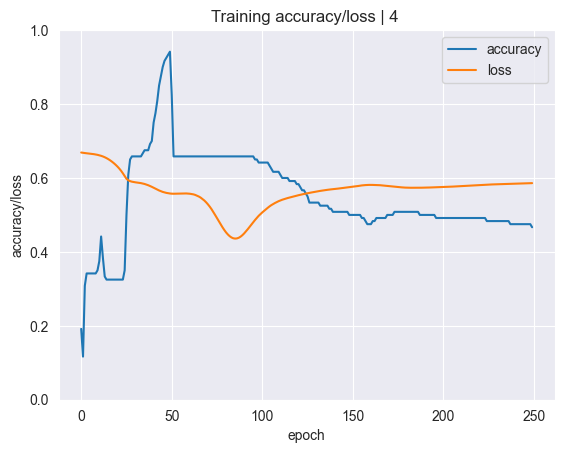

Max test-accuracy: 0.7333333333333333 Min test-loss: 0.8417758014223867


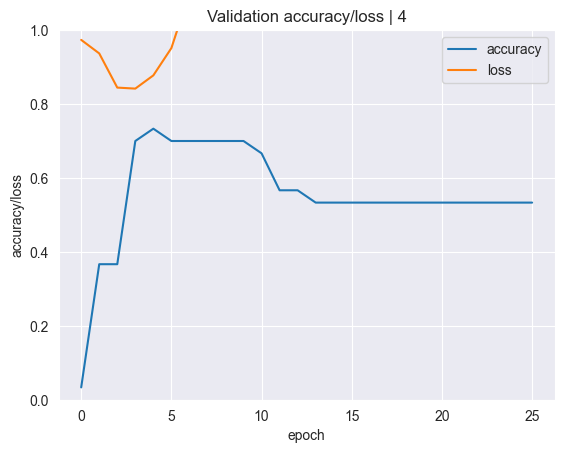

Max accuracy: 0.6666666666666666 Min loss: 0.5573110569335619


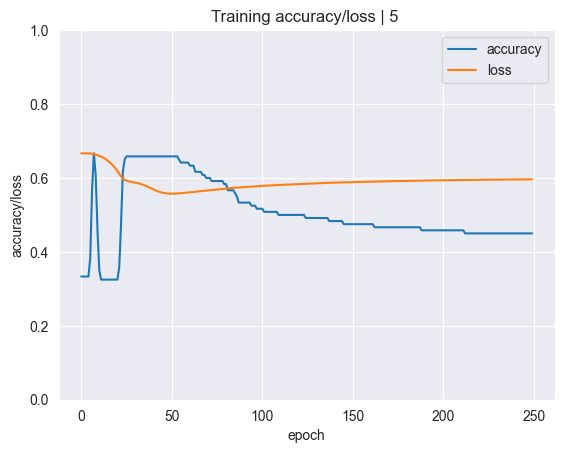

Max test-accuracy: 0.7 Min test-loss: 0.8744151490013553


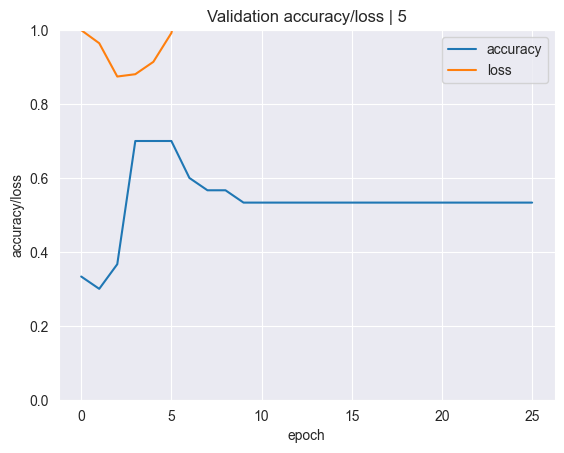

Max accuracy: 0.9833333333333333 Min loss: 0.05225050409895375


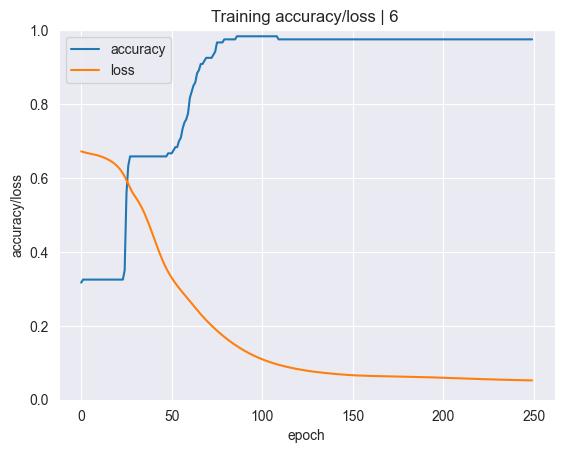

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8704317278058399


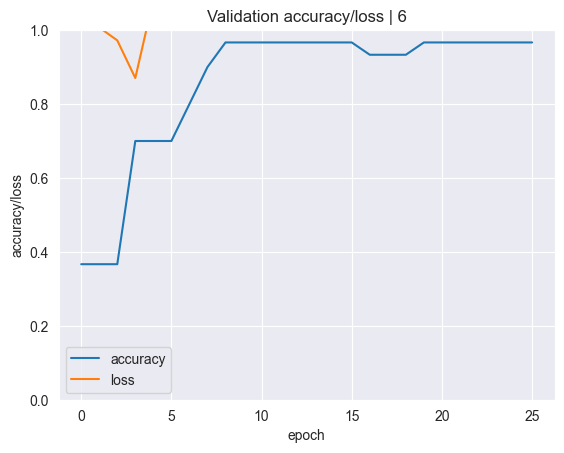

Max accuracy: 0.9833333333333333 Min loss: 0.05109602501517458


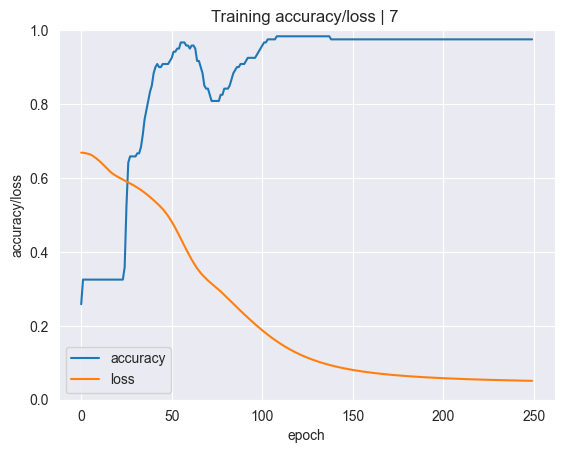

Max test-accuracy: 0.9666666666666667 Min test-loss: 1.0238105143250469


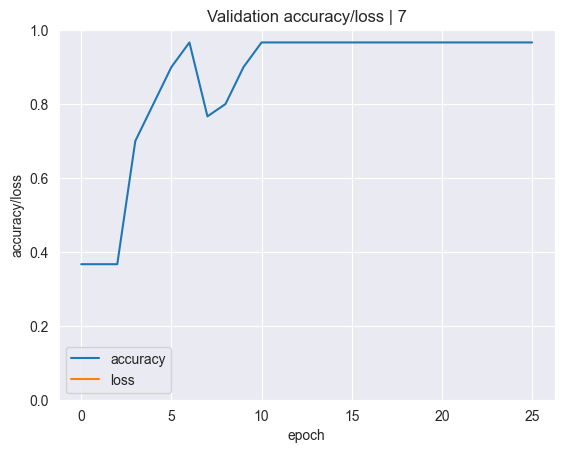

Max accuracy: 0.6583333333333333 Min loss: 0.3366218926286218


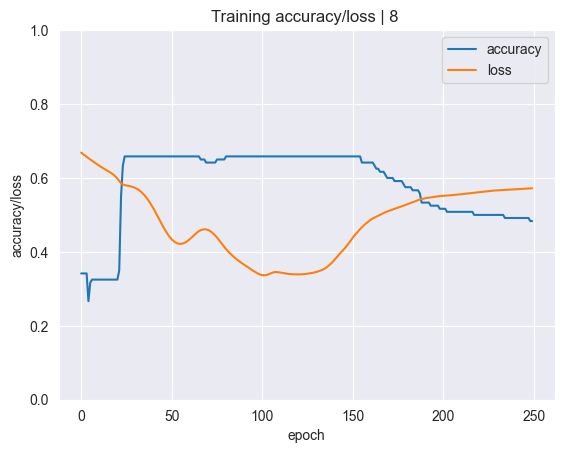

Max test-accuracy: 0.7 Min test-loss: 0.8817720922214384


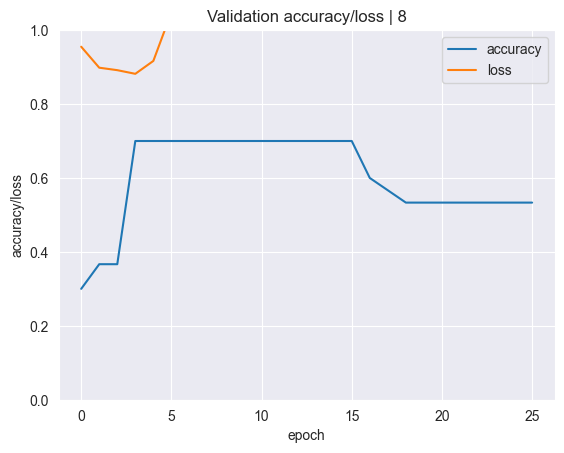

Max accuracy: 0.975 Min loss: 0.0632597585791049


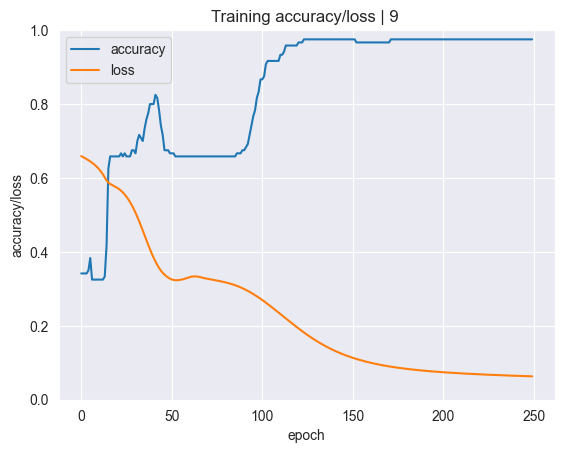

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.7972875736580807


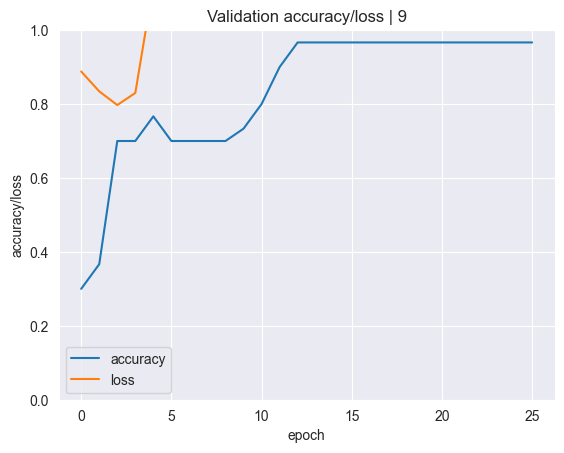

Max accuracy: 0.9833333333333333 Min loss: 0.05488542993755964


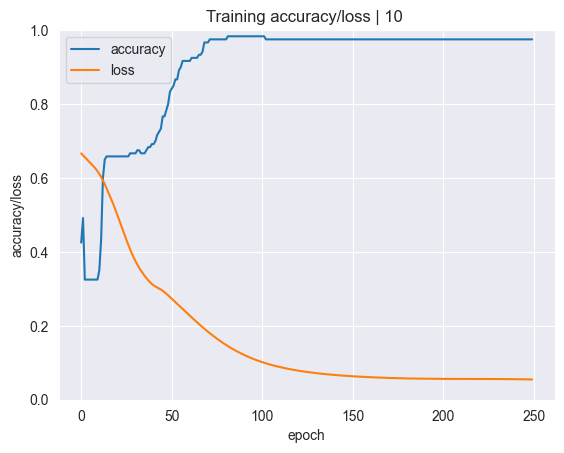

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8133982497607769


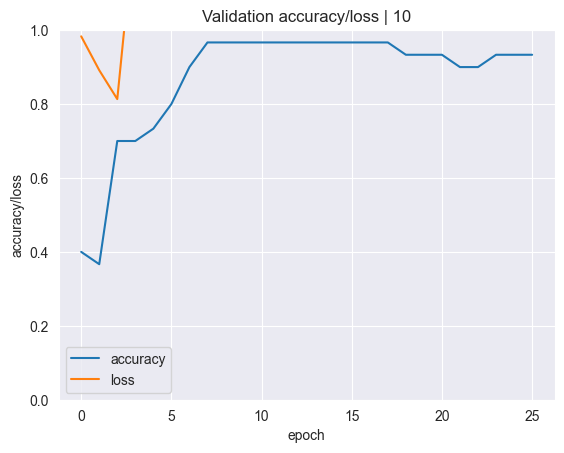

Max accuracy: 0.9666666666666667 Min loss: 0.05276872079948406


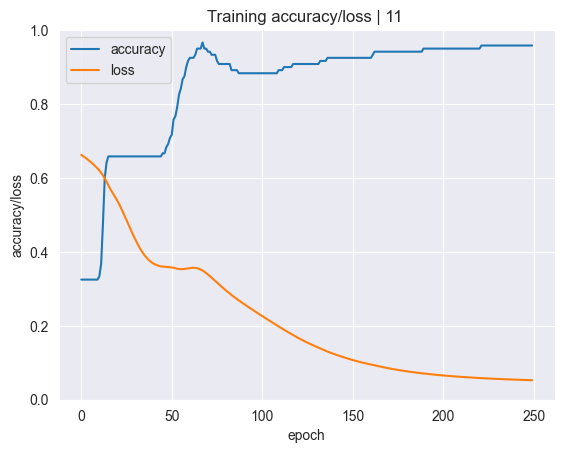

Max test-accuracy: 0.9333333333333333 Min test-loss: 0.7858872325216257


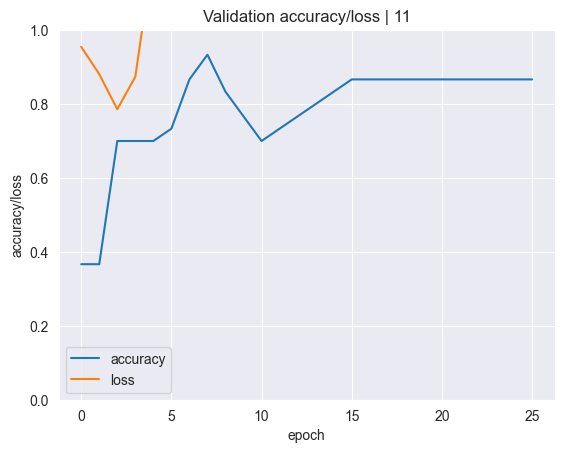

Max accuracy: 0.975 Min loss: 0.05141314355236632


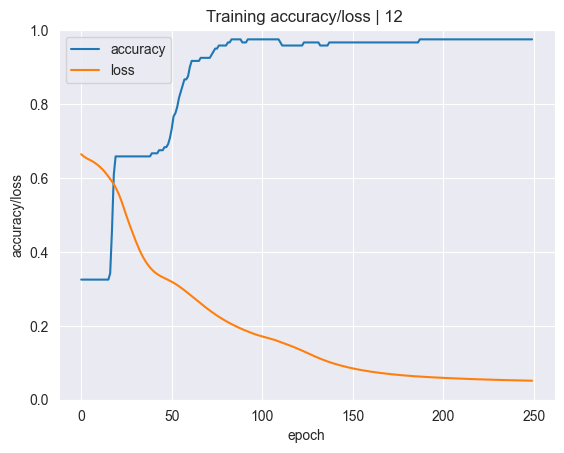

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.7795336304107743


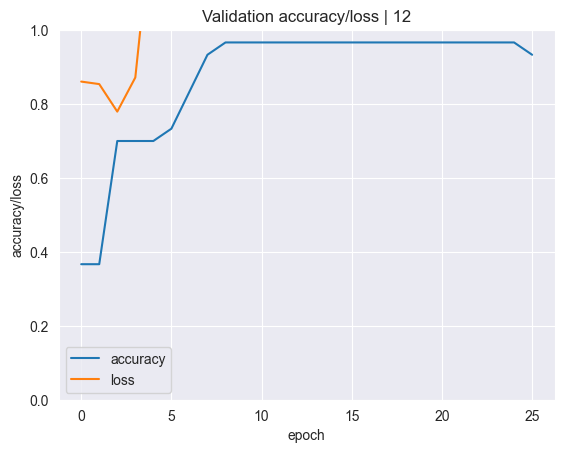

Max accuracy: 0.9833333333333333 Min loss: 0.04957821298428719


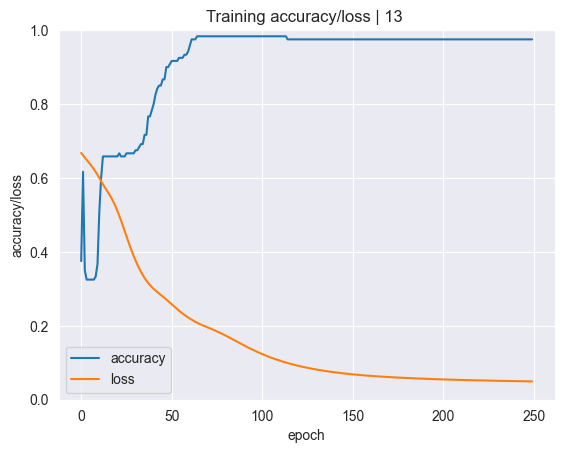

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8320941435550839


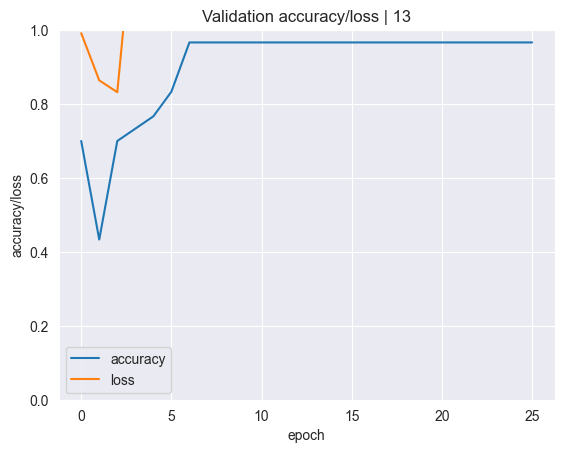

Max accuracy: 0.9833333333333333 Min loss: 0.058595478058148846


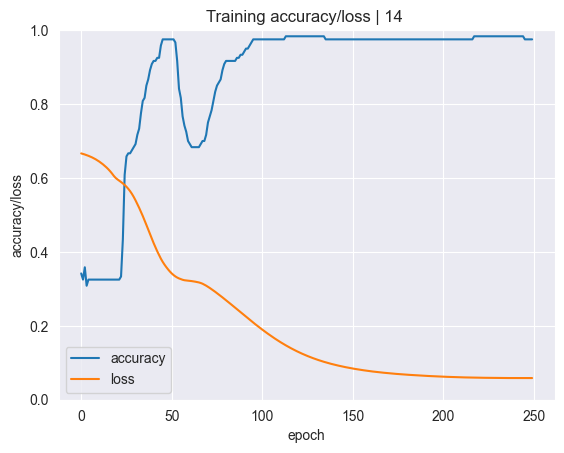

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8469557956241082


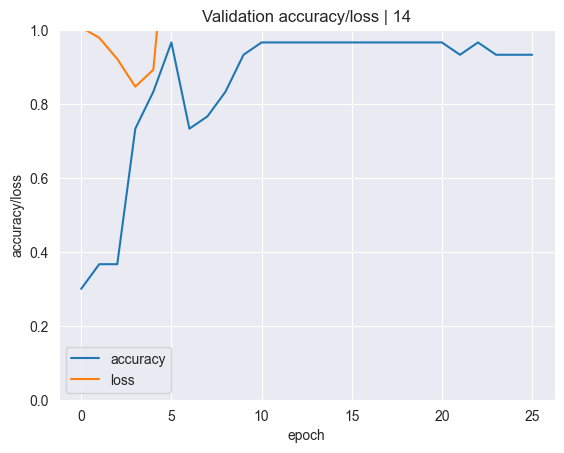

Max accuracy: 0.9833333333333333 Min loss: 0.06947190663261234


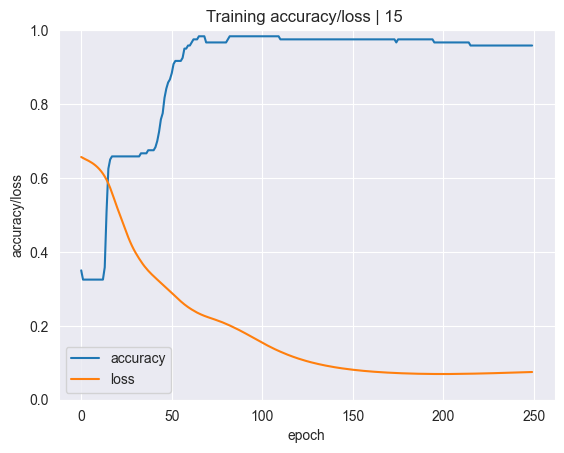

Max test-accuracy: 0.9666666666666667 Min test-loss: 1.1237148814045115


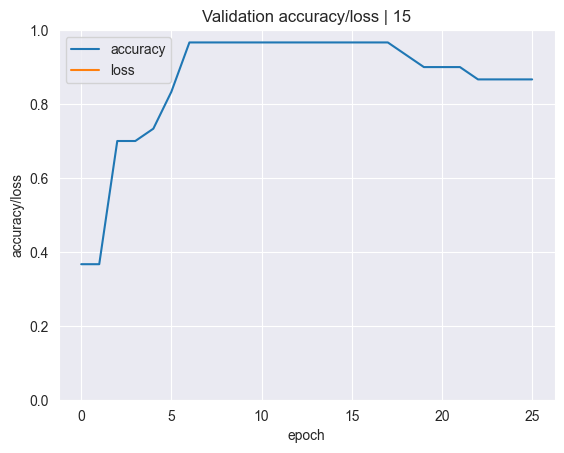

Max accuracy: 0.975 Min loss: 0.04836890066951582


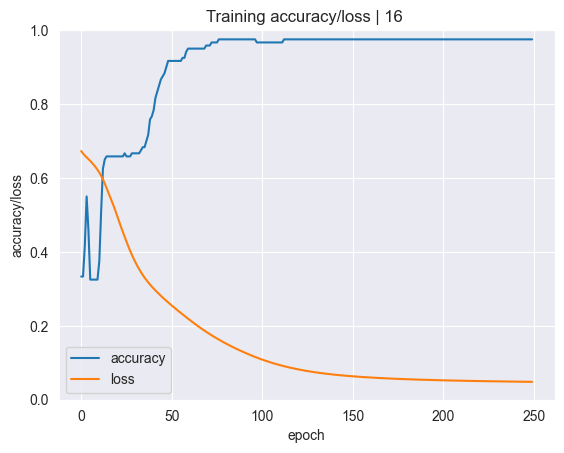

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.6563377260531722


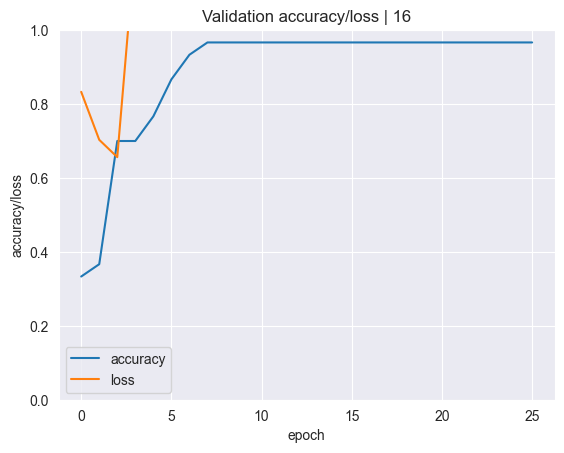

Max accuracy: 0.9833333333333333 Min loss: 0.04941354212037803


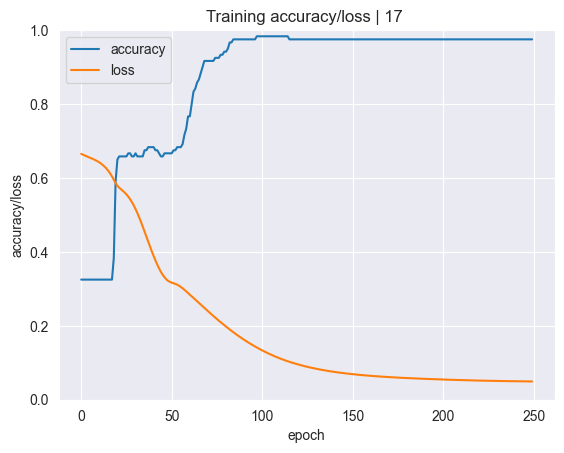

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8879357823780314


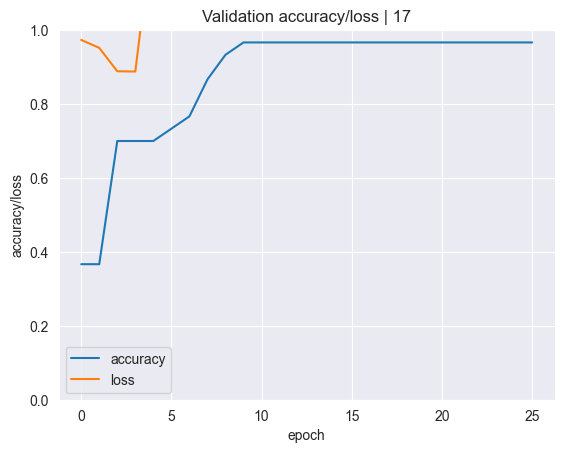

Max accuracy: 0.9833333333333333 Min loss: 0.05169056197744473


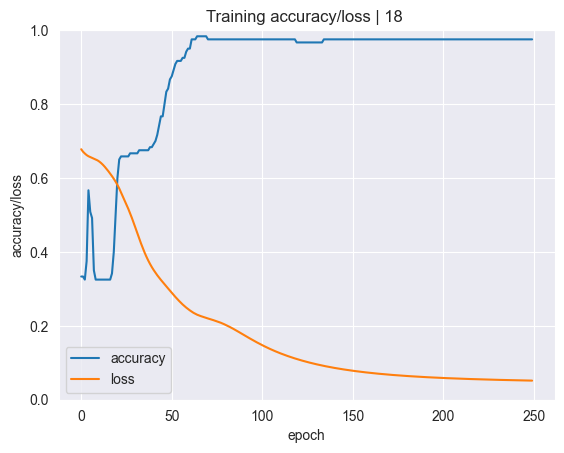

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8903922039570575


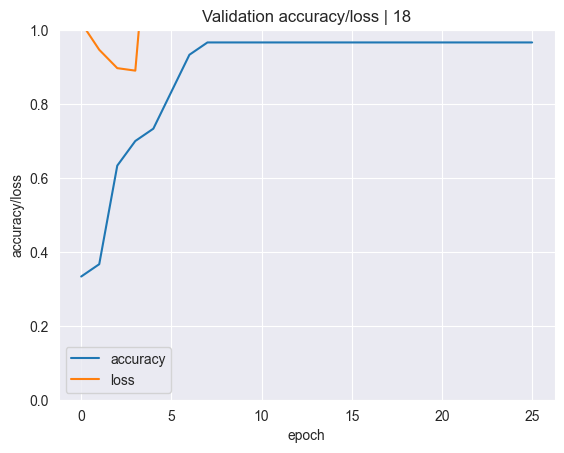

Max accuracy: 0.975 Min loss: 0.05315552571714988


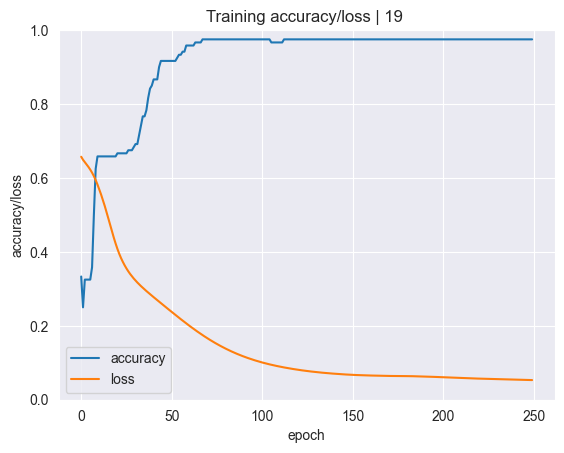

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8529631872775431


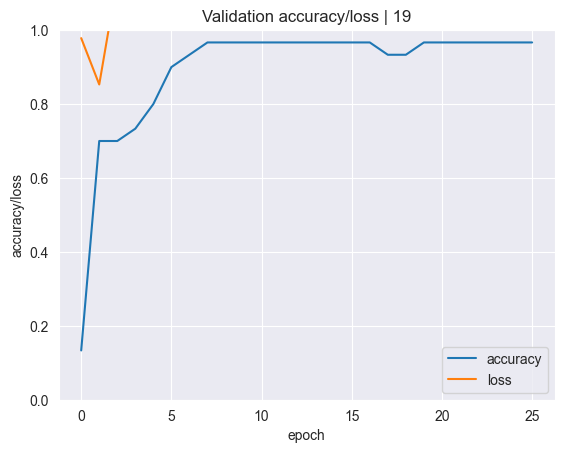

Max accuracy: 0.9833333333333333 Min loss: 0.049683230960051276


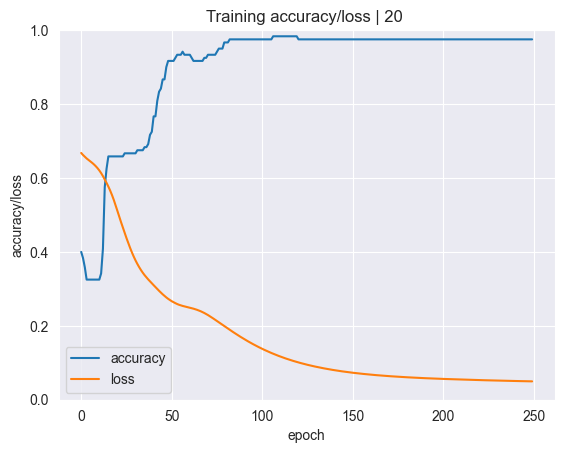

Max test-accuracy: 0.9666666666666667 Min test-loss: 0.8182523419698999


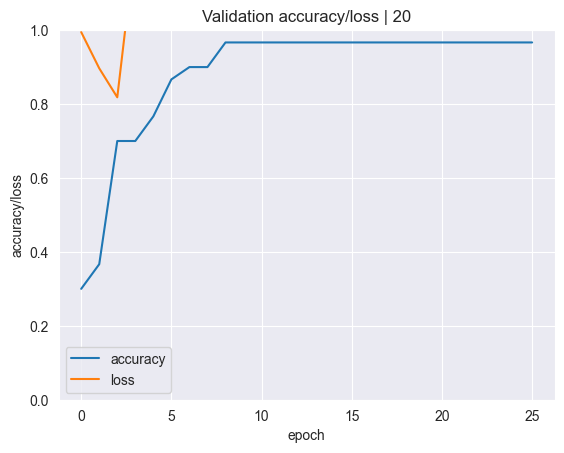

{'size': 6, 'max': 0.9833333333333333} {'size': 16, 'min': 0.04836890066951582}
{'size': 6, 'max': 0.9666666666666667} {'size': 16, 'min': 0.6563377260531722}


In [17]:
def show_plot(size_layer):
    if max_eff_train["max"] < max(accuracy):
        max_eff_train["max"] = max(accuracy)
        max_eff_train["size"] = num
    if min_loss_train["min"] > min(loss):
        min_loss_train["min"] = min(loss)
        min_loss_train["size"] = num

    max_accuracy.append(max(accuracy))
    min_loss.append(min(loss))
    print("Max accuracy:", max(accuracy), "Min loss:", min(loss))

    plt.plot(epoch, accuracy, label="accuracy")
    plt.plot(epoch, loss, label="loss")
    plt.title('Training accuracy/loss | {0} '.format(size_layer))
    plt.xlabel('epoch')
    plt.ylabel('accuracy/loss')
    plt.legend(loc=0)
    plt.ylim(0, 1)
    plt.show()

    if max_eff_test["max"] < max(accuracy_test):
        max_eff_test["max"] = max(accuracy_test)
        max_eff_test["size"] = num
    if min_loss_test["min"] > min(loss_test):
        min_loss_test["min"] = min(loss_test)
        min_loss_test["size"] = num

    max_accuracy_test.append(max(accuracy_test))
    min_test.append(min(loss_test))
    print("Max test-accuracy:", max(accuracy_test), "Min test-loss:", min(loss_test))

    plt.plot(epoch_test, accuracy_test, label="accuracy")
    plt.plot(epoch_test, loss_test, label="loss")
    plt.title('Validation accuracy/loss | {0}'.format(size_layer))
    plt.xlabel('epoch')
    plt.ylabel('accuracy/loss')
    plt.legend(loc=0)
    plt.ylim(0, 1)
    plt.show()


# Словари для запоминания максимальных точности и потерь и соответственно количество нейронов с скрытом слое
max_eff_train = {"size": 0, "max": -100}
min_loss_train = {"size": 0, "min": 100}

# Для тестовых данных
max_eff_test = {"size": 0, "max": -100}
min_loss_test = {"size": 0, "min": 100}
# -----------------------------------------

# Следующие переменные нужны для представления общих графиков в соотношении точности/потерь к кол-ву нейронов в скрытом слое, представленных после этой секции кода
max_accuracy = []
min_loss = []

max_accuracy_test = []
min_test = []
# ------------------------------------------

count = 21

for num in range(4, count):
    alpha, iterations, hidden_size, input_d, num_labels = (0.001, 250, num, 4, 3)

    weights_0_1 = 0.2 * np.random.random((input_d, hidden_size)) - 0.1
    weights_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1

    # данные переменные нужны для представления графиков в определенное кол-ве нейронов в скрытом слое
    loss = []
    accuracy = []
    loss_test = []
    accuracy_test = []

    for interation in range(iterations):
        error, correct_cnt = (0.0, 0)
        for i in range(len(x_train)):
            layer_0 = x_train[i:i + 1]
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            # dropout_mask = np.random.randint(2, size=layer_1.shape)
            # layer_1 *= dropout_mask * 2
            layer_2 = softmax(np.dot(layer_1, weights_1_2))

            error += np.sum((layer_2 - y_train[i:i + 1]) ** 2)

            correct_cnt += int(np.argmax(layer_2) == np.argmax(y_train[i:i + 1]))

            layer_2_delta = (y_train[i:i + 1] - layer_2)
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
            # layer_1_delta *= dropout_mask

            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

        # sys.stdout.write("\n" + " I:" + str(interation) + " Error:" + str(error / float(len(x_train)))[0:5] + " Correct:" + str(correct_cnt / float(len(x_train))))
        loss.append(error / float(len(x_train)))
        accuracy.append(correct_cnt / float(len(x_train)))

        if interation % 10 == 0 or interation == iterations - 1:
            error, correct_cnt = (0.0, 0)
            for i in range(len(x_test)):
                layer_0 = x_test[i:i + 1]
                layer_1 = relu(np.dot(layer_0, weights_0_1))
                layer_2 = np.dot(layer_1, weights_1_2)

                error += np.sum((y_test[i:i + 1] - layer_2) ** 2)
                correct_cnt += int(np.argmax(layer_2) == np.argmax(y_test[i:i + 1]))

            # sys.stdout.write(" Test-Err:" + str(error / float(len(x_test)))[0:5] + " Test-Acc:" + str(correct_cnt / float(len(x_test))))
            loss_test.append(error / float(len(x_test)))
            accuracy_test.append(correct_cnt / float(len(x_test)))

    show_plot(num)

print(max_eff_train, min_loss_train)
print(max_eff_test, min_loss_test)


Два слудующих графика представляют все верхние

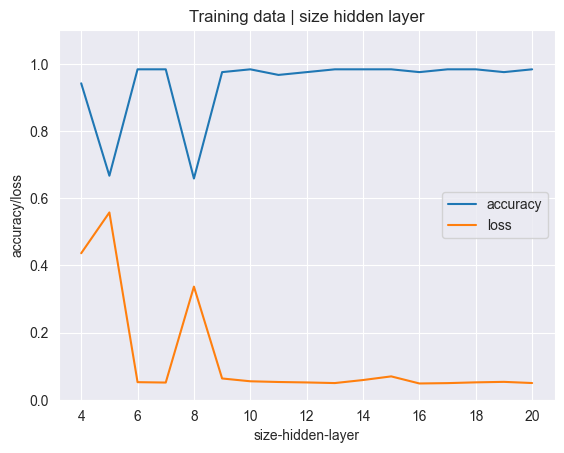

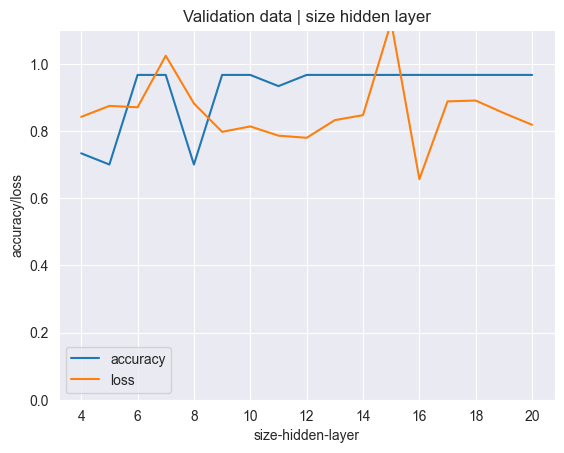

In [18]:
num_size = [i for i in range(4, count)]

plt.plot(num_size, max_accuracy, label="accuracy")
plt.plot(num_size, min_loss, label="loss")
plt.title('Training data | size hidden layer')
plt.xlabel('size-hidden-layer')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1.1)
plt.show()

plt.plot(num_size, max_accuracy_test, label="accuracy")
plt.plot(num_size, min_test, label="loss")
plt.title('Validation data | size hidden layer')
plt.xlabel('size-hidden-layer')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1.1)
plt.show()